# Do you even compare the metrics of your models bro

In [44]:
#run as-is

import pandas as pd

from sklearn.datasets import make_classification

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report, plot_roc_curve
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

data = make_classification(n_samples=10000, random_state=666, n_informative=6)

X = pd.DataFrame(data[0])
y = data[1]

data = X.copy()
data['target'] = y

#### How many features in `data`?  How many classes?  Is there a class imbalance?

In [10]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,target
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.047426,0.001262,0.009409,-0.984810,0.029707,0.003775,-0.507632,0.017509,-0.015795,0.001107,...,0.022596,-0.011685,0.518786,0.003125,0.004473,0.777638,-0.003698,-0.504460,-0.004944,0.499600
std,2.113713,1.002555,1.709822,1.342651,1.925238,0.991712,1.645245,0.992204,1.003442,1.003310,...,0.998053,0.991342,1.807160,0.993287,0.998520,2.238087,0.996981,1.669316,0.996607,0.500025
min,-10.815670,-4.053760,-4.805634,-7.205780,-6.960690,-4.045246,-7.347161,-3.744947,-3.573493,-3.563479,...,-4.152376,-4.129424,-5.816367,-3.650499,-3.784189,-6.284353,-4.191037,-6.505326,-4.940640,0.000000
25%,-1.208187,-0.663321,-1.235571,-1.777991,-1.268203,-0.679164,-1.629727,-0.653572,-0.700202,-0.678241,...,-0.643716,-0.676067,-0.723655,-0.677824,-0.653865,-0.819720,-0.677925,-1.557157,-0.684362,0.000000
50%,0.205316,-0.005653,-0.188923,-0.990643,0.073177,0.002687,-0.527357,0.017758,-0.021341,0.013586,...,0.020412,0.002989,0.537565,-0.001667,0.005032,0.762738,-0.005047,-0.652369,-0.001781,0.000000
75%,1.481395,0.680125,1.127041,-0.187811,1.359280,0.674258,0.640132,0.683644,0.663577,0.682270,...,0.686818,0.651143,1.750244,0.684668,0.685858,2.386938,0.655119,0.477578,0.668673,1.000000
max,6.994064,3.953283,6.386710,5.136473,7.599124,3.986217,5.324941,4.091164,3.672437,4.396441,...,3.781176,3.612928,6.934468,3.985126,3.634264,9.345701,3.465004,7.400703,4.342353,1.000000


In [12]:
## Determining unique values for target column

data['target'].nunique()

2

In [11]:
## Determining class balance

data['target'].value_counts()

0    5004
1    4996
Name: target, dtype: int64

**# Features:** 20

**# Classes:** 2

**Balanced?** Yes; imbalance around 5:1 count

#### Train-test split (`random_state` = 666) and standard scale all features

  - Why do we standardize *after* the train test split, and not before?

  - Why do we scale the training data separately from the testing data?

In [14]:
# Separate data into feature and target DataFrames
X = data.drop('target', axis = 1).copy()
y = data['target'].copy()

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

# Scale the data for modeling
scaler = StandardScaler()
scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

#### Create a logistic regression model with the first three features of the training data (with no regularization)

In [28]:
## Pulling rows from nested arrays
first_three_train = X_train_sc[:,:3]

# Train a logistic regresssion model with the train data
log_reg = LogisticRegression()
log_reg.fit(first_three_train, y_train)

LogisticRegression()

#### Get predictions for this 3-feature model for the training data

- Assign them to `train_preds_3`

In [29]:
train_preds_3 = log_reg.predict(first_three)

#### Get predictions for this 3-feature model for the testing data

- Assign them to `test_preds_3`

In [30]:
# Pulling rows from nested array for test
first_three_test = X_test_sc[:,:3]

test_preds_3 = log_reg.predict(first_three)

# Evaluate

Generate two confusion matrices, one each for the training predictions and testing predictions

Calculate the accuracy, recall, and precision for the training predictions

 Calculate the accuracy, recall, and precision for the testing predictions

In [42]:
def evaluate_classification(log_reg, X_test_tf, y_test,classes=None,
                            cmap='Reds',normalize='true', figsize=(10,4)):
      
    y_hat_test = log_reg.predict(X_test_tf)
    
    print('|' + '----'*4 + ' Classification Matrix ' + '---'*5 + '|'+ '\n')
    print(classification_report(y_test, y_hat_test,
                                        target_names=classes))
    print('|' + '---'*17 + '---'+'|'+'\n')
    
    fig, ax = plt.subplots(ncols=2, figsize = figsize)
    plot_confusion_matrix(log_reg, X_test_tf,y_test,cmap=cmap,
                                  normalize=normalize, display_labels=classes,
                                 ax=ax[0])

    curve = plot_roc_curve(log_reg, X_test_tf, y_test,ax=ax[1])
    curve.ax_.grid()
    curve.ax_.plot([0,1],[0,1], ls=':')
    
    plt.tight_layout()
    
    return None

|---------------- Classification Matrix ---------------|

              precision    recall  f1-score   support

           0       0.79      0.75      0.77      3771
           1       0.76      0.80      0.78      3729

    accuracy                           0.78      7500
   macro avg       0.78      0.78      0.78      7500
weighted avg       0.78      0.78      0.78      7500

|------------------------------------------------------|



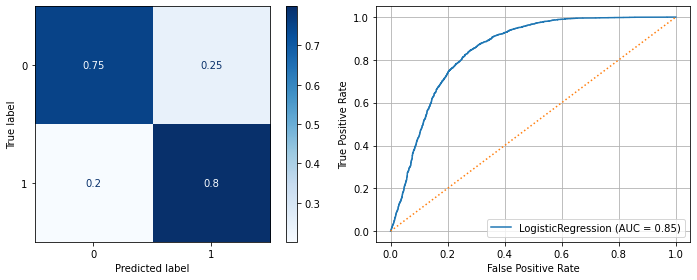

In [45]:
evaluate_classification(log_reg, first_three_train, y_train, cmap='Blues', 
                      normalize='true');

|---------------- Classification Matrix ---------------|

              precision    recall  f1-score   support

           0       0.78      0.75      0.76      1233
           1       0.76      0.79      0.78      1267

    accuracy                           0.77      2500
   macro avg       0.77      0.77      0.77      2500
weighted avg       0.77      0.77      0.77      2500

|------------------------------------------------------|



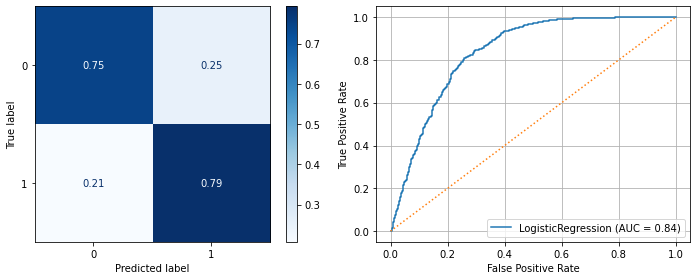

In [49]:
evaluate_classification(log_reg, first_three_test, y_test, cmap='Blues', 
                      normalize='true');

In [ ]:
#your work here

# Over-/Under-fitting

#### Is the model over- or under-fitting?  How can you tell?

#### Is bias or variance more of a problem with this model?

* Underfitting due to poor performance (domain-specific determination; poor in this case due to small dataset)

* Bias due to poor prediction on both

#### Run models with the first 10 variables, then another model with all the variables

  - Generate confusion matrices and calculate accuracy, precision and recall as you did above
  - **BONUS**: use functions to do so!

|---------------- Classification Matrix ---------------|

              precision    recall  f1-score   support

           0       0.88      0.85      0.87      3771
           1       0.85      0.89      0.87      3729

    accuracy                           0.87      7500
   macro avg       0.87      0.87      0.87      7500
weighted avg       0.87      0.87      0.87      7500

|------------------------------------------------------|



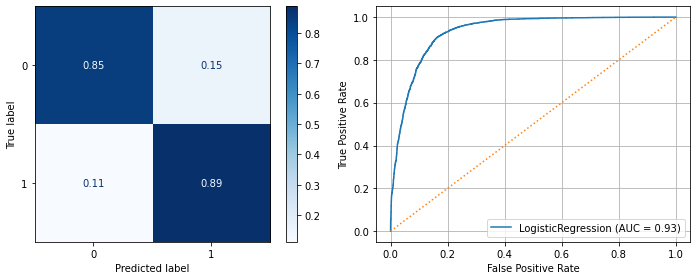

In [51]:
## Pulling rows from nested arrays
first_ten_train = X_train_sc[:,:10]

# Train a logistic regresssion model with the train data
log_reg_ten = LogisticRegression()
log_reg_ten.fit(first_ten_train, y_train)

evaluate_classification(log_reg_ten, first_ten_train, y_train, cmap='Blues', 
                      normalize='true');

|---------------- Classification Matrix ---------------|

              precision    recall  f1-score   support

           0       0.88      0.84      0.86      1233
           1       0.85      0.89      0.87      1267

    accuracy                           0.87      2500
   macro avg       0.87      0.87      0.87      2500
weighted avg       0.87      0.87      0.87      2500

|------------------------------------------------------|



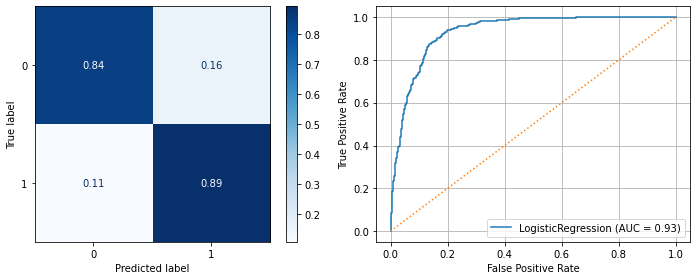

In [54]:
# Train a logistic regresssion model with the test data
log_reg_all = LogisticRegression()
log_reg_all.fit(X_test_sc, y_test)

evaluate_classification(log_reg_all, X_test_sc, y_test, cmap='Blues', 
                      normalize='true');

#### How is the problem you diagnosed in the 3-variable model altered in the 10-variable and 20-variable models?

* Better performance, 9% increase on AUCs and accuracy scores on full data

#### What new problems crop up?

* Increased false positives (lower recall and F1 scores on test data)